In [31]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils
print(os.getcwd())

/Users/housemex408/Documents/Git-Projects/PRAXIS/iROIEstimator/scripts/notebook/results/FINAL/H3


In [32]:

file_line = "h3_model_performance_05_27_2020.csv"

df = pd.read_csv(file_line)

print(len(df))
# df.dropna(subset=[c.PRED_25], inplace=True)
# df.dropna(subset=[c.PRED_50], inplace=True)

# df.where(df[c.T_RECORDS] > 2, inplace = True)
# df.where(df[c.P_NA] <= .75, inplace = True)
# df.dropna()

print(len(df))

3456
3456


In [33]:
def print_is_gaussian(sample, pred, task_type, alpha):
    print("\nGaussian test for {0}:\n".format(task_type))
    utils.gaussian_test(sample[pred], alpha)

In [34]:
def print_std(sample, pred, task_type):
    print("{0} sample std: {1}".format(task_type, round(sample[pred].std(), 2)))

In [35]:
def print_median(sample, pred, task_type):
    print("{0} sample median: {1}".format(task_type, round(sample[pred].median(), 2)))

In [36]:
def get_task_sample(df, task_type, sample_size):
    sample = df[df[c.TASK] == task_type].sample(n=sample_size, random_state=0)
    return sample

In [37]:
def hypothesisTest_Effort(model_records, model, pred, sample_size):
    print("H3 test for {0}:".format(model))
    
    s1_filter = (model_records[c.MODEL] == model)
    model_records = model_records[s1_filter]

    s1 = get_task_sample(model_records, "BUG", sample_size)
    s2 = get_task_sample(model_records, "DOCS", sample_size)
    s3 = get_task_sample(model_records, "REFACTOR", sample_size)
    s4 = get_task_sample(model_records, "TESTING", sample_size)
    s5 = get_task_sample(model_records, "FEATURE", sample_size)
    s6 = get_task_sample(model_records, "UPGRADE", sample_size)
    s7 = get_task_sample(model_records, "RELEASE", sample_size)
    s8 = get_task_sample(model_records, "SUPPORT", sample_size)
    s9 = get_task_sample(model_records, "OTHER", sample_size)

    num_records = len(s1)

    print("Number of records: {:.2f}".format(num_records))

    alpha = 0.05

    samples = [s1, s2, s3, s4, s5, s6, s7, s8, s9]

    for s in samples:
        print_median(s, pred, s.Task.values[0])

    for s in samples:
        print_std(s, pred, s.Task.values[0])
    
    for s in samples:
        print_is_gaussian(s, pred, s.Task.values[0], alpha)


    utils.multi_sample_rank_test(s1[pred], s2[pred], s3[pred], s4[pred], s5[pred], s6[pred], s7[pred], s8[pred], s9[pred], alpha)

    fig = plt.figure(figsize=(10,5))
    plt.tight_layout()
    sb.set(style="ticks", palette="pastel")
    sb.boxplot(x=c.TASK, y=c.PRED_25, palette=["m", "g"], data=model_records)
    sb.despine(offset=10, trim=True)
    plt.show()

In [38]:
task = "BUG"
sample_size = 30

H3 test for Module_CC:
Number of records: 30.00
BUG sample median: 0.7
DOCS sample median: 0.89
REFACTOR sample median: 0.94
TESTING sample median: 0.84
FEATURE sample median: 0.96
UPGRADE sample median: 0.94
RELEASE sample median: 0.92
SUPPORT sample median: 0.89
OTHER sample median: 0.6
BUG sample std: 0.14
DOCS sample std: 0.12
REFACTOR sample std: 0.07
TESTING sample std: 0.14
FEATURE sample std: 0.07
UPGRADE sample std: 0.09
RELEASE sample std: 0.14
SUPPORT sample std: 0.11
OTHER sample std: 0.17

Gaussian test for BUG:

Shapiro p-value:  0.3466225266456604
Shapiro Test: Sample looks Gaussian (fail to reject H0)

Gaussian test for DOCS:

Shapiro p-value:  9.394757216796279e-05
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  0.020826289430260658
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  0.02799452282488346
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaus

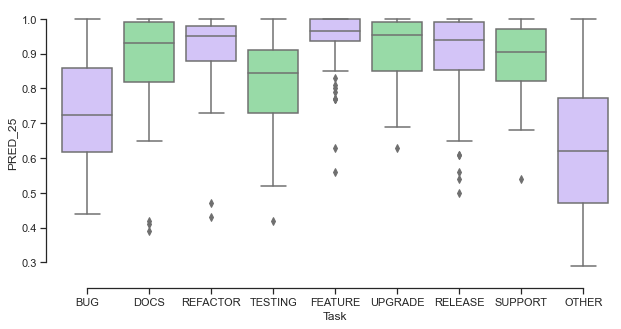

In [39]:
hypothesisTest_Effort(df.copy(), c.MODULE_CC, c.PRED_25, sample_size)

H3 test for Module_EC:
Number of records: 30.00
BUG sample median: 0.9
DOCS sample median: 0.96
REFACTOR sample median: 0.99
TESTING sample median: 0.94
FEATURE sample median: 0.98
UPGRADE sample median: 0.98
RELEASE sample median: 0.99
SUPPORT sample median: 0.96
OTHER sample median: 0.79
BUG sample std: 0.12
DOCS sample std: 0.09
REFACTOR sample std: 0.08
TESTING sample std: 0.12
FEATURE sample std: 0.06
UPGRADE sample std: 0.08
RELEASE sample std: 0.1
SUPPORT sample std: 0.11
OTHER sample std: 0.18

Gaussian test for BUG:

Shapiro p-value:  0.00020021089585497975
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for DOCS:

Shapiro p-value:  2.9170774723752402e-05
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  3.118522897693765e-07
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  3.152803037664853e-05
Shapiro Test: Sample does not look Gaussian (reject H

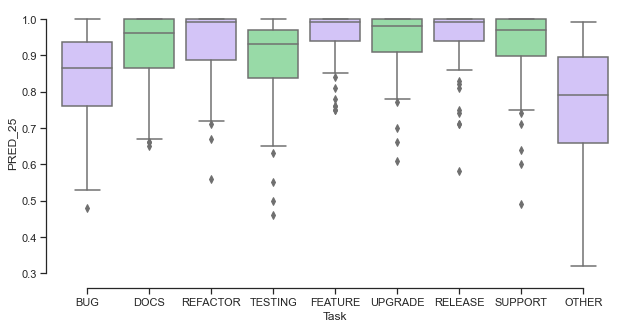

In [40]:
hypothesisTest_Effort(df.copy(), c.MODULE_EC, c.PRED_25, sample_size)

H3 test for Line_CC:
Number of records: 30.00
BUG sample median: 0.63
DOCS sample median: 0.87
REFACTOR sample median: 0.94
TESTING sample median: 0.8
FEATURE sample median: 0.95
UPGRADE sample median: 0.92
RELEASE sample median: 0.88
SUPPORT sample median: 0.86
OTHER sample median: 0.51
BUG sample std: 0.16
DOCS sample std: 0.13
REFACTOR sample std: 0.07
TESTING sample std: 0.16
FEATURE sample std: 0.07
UPGRADE sample std: 0.11
RELEASE sample std: 0.17
SUPPORT sample std: 0.13
OTHER sample std: 0.19

Gaussian test for BUG:

Shapiro p-value:  0.6203530430793762
Shapiro Test: Sample looks Gaussian (fail to reject H0)

Gaussian test for DOCS:

Shapiro p-value:  0.006088233087211847
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  0.011790923774242401
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  0.08208755403757095
Shapiro Test: Sample looks Gaussian (fail to reject H0)

Gaussi

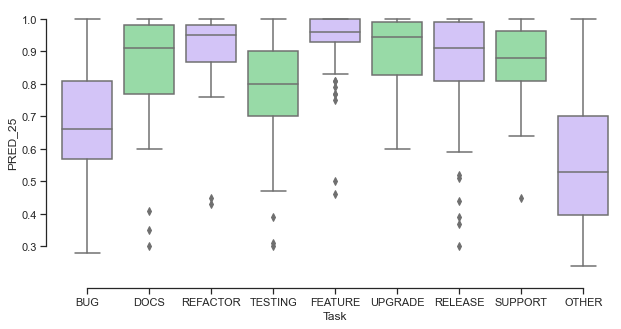

In [41]:
hypothesisTest_Effort(df.copy(), c.LINE_CC, c.PRED_25, sample_size)

H3 test for Line_EC:
Number of records: 30.00
BUG sample median: 0.86
DOCS sample median: 0.95
REFACTOR sample median: 0.99
TESTING sample median: 0.92
FEATURE sample median: 0.98
UPGRADE sample median: 0.98
RELEASE sample median: 0.99
SUPPORT sample median: 0.96
OTHER sample median: 0.76
BUG sample std: 0.16
DOCS sample std: 0.1
REFACTOR sample std: 0.09
TESTING sample std: 0.14
FEATURE sample std: 0.06
UPGRADE sample std: 0.08
RELEASE sample std: 0.12
SUPPORT sample std: 0.12
OTHER sample std: 0.21

Gaussian test for BUG:

Shapiro p-value:  6.997870514169335e-05
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for DOCS:

Shapiro p-value:  5.820466685690917e-05
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  1.3421201572327845e-07
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  4.709022323368117e-05
Shapiro Test: Sample does not look Gaussian (reject H0)

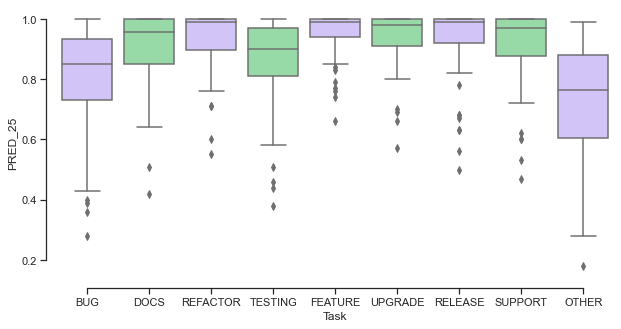

In [42]:
hypothesisTest_Effort(df.copy(), c.LINE_EC, c.PRED_25, sample_size)